In [ ]:
!pip3 install pandas
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install scikit-learn

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
from sklearn import preprocessing
import matplotlib.pyplot as plt

datat = pd.read_csv('dada.csv')

In [196]:
datat

,author,author_type,url,location,deal_type,accommodation_type,floor,floors_count,rooms_count,total_meters,...,finish_type,living_meters,kitchen_meters,phone,ceiling_height,district,street,house_number,underground,residential_complex
0,ID 115709096,homeowner,https://serpukhov.cian.ru/sale/flat/301136001/,Серпухов,sale,flat,6,6,1,20.7,...,-1,18 м²,1 м²,79175096253,3 м,Серпухов,Крюкова,4,NaN,NaN
1,Самолёт плюс Подмосковье Серпухов,real_estate_agent,https://serpukhov.cian.ru/sale/flat/305145433/,Серпухов,sale,flat,1,9,1,33,...,-1,18 м²,6 м²,79645530086,"2,7 м",NaN,Ворошилова,144,Аннино,NaN
2,ID 3246838,realtor,https://serpukhov.cian.ru/sale/flat/308145954/,Серпухов,sale,flat,4,4,1,14,...,-1,-1,-1,79807126116,-1,Красный Текстильщик мкр,Красный Текстильщик,2,NaN,NaN
3,ID 64398571,unknown,https://serpukhov.cian.ru/sale/flat/309086009/,Серпухов,sale,flat,5,5,1,17.5,...,-1,-1,-1,79645652380,-1,Серпухов,Российская,40,NaN,NaN
4,ЛИДЕРМЭЙН,real_estate_agent,https://serpukhov.cian.ru/sale/flat/308401669/,Серпухов,sale,flat,4,7,1,25.9,...,-1,20 м²,5 м²,79099408093,"3,5 м",Серпухов,Химиков,8,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,МИЭЛЬ,real_estate_agent,https://mytishchi.cian.ru/sale/flat/308939371/,Мытищи,sale,flat,8,14,2,69.7,...,-1,38 м²,"10,5 м²",79672094035,-1,NaN,Юбилейная,6,Медведково,Ярославский
8389,ПИК,developer,https://mytishchi.cian.ru/sale/flat/306943495/,Мытищи,sale,flat,19,25,2,48.1,...,Чистовая,"22,7 м²","16,1 м²",74951370494,"2,62 м",NaN,NaN,NaN,Ростокино,Ярославский квартал ЖК
8390,ID 47276638,homeowner,https://mytishchi.cian.ru/sale/flat/294184046/,Мытищи,sale,flat,3,5,2,45,...,-1,-1,6 м²,79153266030,-1,NaN,Юбилейная,11к3,Медведково,NaN
8391,EstateLiga,real_estate_agent,https://mytishchi.cian.ru/sale/flat/304572510/,Мытищи,sale,flat,3,6,2,34,...,-1,19 м²,8 м²,79651097781,"2,75 м",NaN,бульвар Тенистый,5,Медведково,Императорские Мытищи


In [197]:
datat = datat.drop_duplicates()

In [198]:
datat.loc[:, :] = datat.replace('-1', np.nan)

<ipython-input-198-70b0edc68142>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datat.loc[:, :] = datat.replace('-1', np.nan)


In [199]:
datat.columns

Index(['author', 'author_type', 'url', 'location', 'deal_type',
       'accommodation_type', 'floor', 'floors_count', 'rooms_count',
       'total_meters', 'price', 'year_of_construction', 'object_type',
       'have_loggia', 'parking_type', 'house_material_type', 'heating_type',
       'finish_type', 'living_meters', 'kitchen_meters', 'phone',
       'ceiling_height', 'district', 'street', 'house_number', 'underground',
       'residential_complex'],
      dtype='object')

<Axes: >

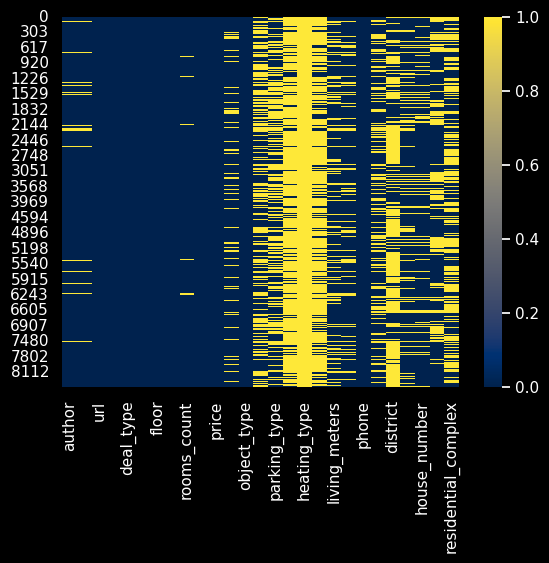

In [200]:
sns.set_theme(style="darkgrid")
plt.style.use('dark_background')
sns.heatmap(datat.isnull(),cmap='cividis')

In [201]:
datat = datat.drop(['author', 'author_type', 'phone', 'url', 'house_number', 'deal_type', 'residential_complex', 'house_material_type', 'district', 'finish_type', 'heating_type', 'accommodation_type'], axis=1)

In [202]:
datat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7227 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7226 non-null   object
 1   floor                 7226 non-null   object
 2   floors_count          7226 non-null   object
 3   rooms_count           7133 non-null   object
 4   total_meters          7226 non-null   object
 5   price                 7213 non-null   object
 6   year_of_construction  5975 non-null   object
 7   object_type           7226 non-null   object
 8   have_loggia           4157 non-null   object
 9   parking_type          4045 non-null   object
 10  living_meters         5608 non-null   object
 11  kitchen_meters        6015 non-null   object
 12  ceiling_height        4687 non-null   object
 13  street                5728 non-null   object
 14  underground           5023 non-null   object
dtypes: object(15)
memory usage: 903.4+ KB


In [203]:
datat = datat.dropna(how='all') # убираем строки с значением NaN

In [204]:
datat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7226 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   location              7226 non-null   object
 1   floor                 7226 non-null   object
 2   floors_count          7226 non-null   object
 3   rooms_count           7133 non-null   object
 4   total_meters          7226 non-null   object
 5   price                 7213 non-null   object
 6   year_of_construction  5975 non-null   object
 7   object_type           7226 non-null   object
 8   have_loggia           4157 non-null   object
 9   parking_type          4045 non-null   object
 10  living_meters         5608 non-null   object
 11  kitchen_meters        6015 non-null   object
 12  ceiling_height        4687 non-null   object
 13  street                5728 non-null   object
 14  underground           5023 non-null   object
dtypes: object(15)
memory usage: 903.2+ KB


In [205]:
# Заменяем 'price' на NaN
datat['price'] = pd.to_numeric(datat['price'], errors='coerce')

# Удаляем строки с NaN
datat = datat.dropna(subset=['price'])
# Преобразуем тип значения в float
datat['price'] = datat['price'].astype(float)

datat['price'].info()

<class 'pandas.core.series.Series'>
Index: 7212 entries, 0 to 8392
Series name: price
Non-Null Count  Dtype  
--------------  -----  
7212 non-null   float64
dtypes: float64(1)
memory usage: 112.7 KB


<ipython-input-205-5341a49d31a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datat['price'] = pd.to_numeric(datat['price'], errors='coerce')


<Axes: >

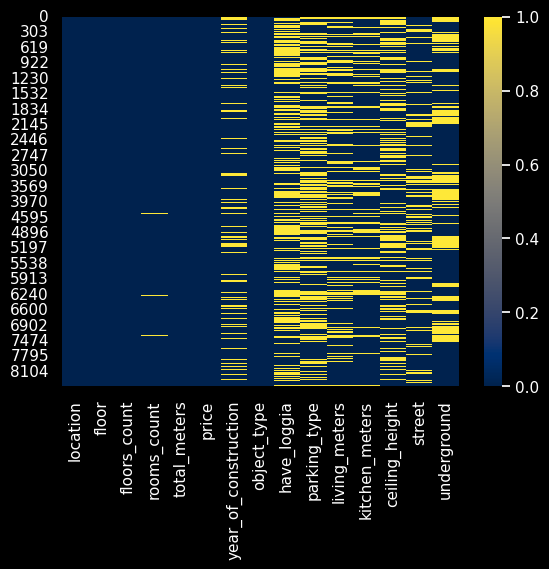

In [206]:
sns.heatmap(datat.isnull(),cmap='cividis')

<Axes: >

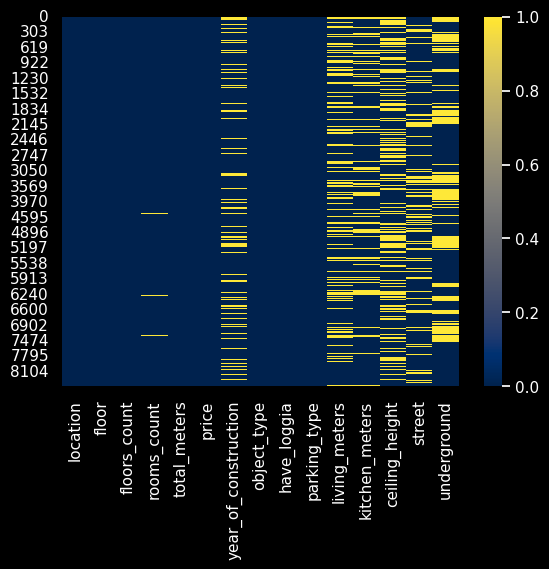

In [207]:
datat['have_loggia'] = datat['have_loggia'].fillna('0')
datat['parking_type'] = datat['parking_type'].fillna('0')
# Заменяем все пропущенные значения (NaN) в столбце have_loggia и parking_type на строку '0'

sns.heatmap(datat.isnull(),cmap='cividis')

In [208]:
datat.loc[pd.notna(datat['underground']), 'underground'] = 1
# Заменяем все непропущенные значения NaN в столбце underground на 1
datat.loc[pd.isna(datat['underground']), 'underground'] = 0
# Заменяем все пропущенные значения NaN в столбце underground на 0

<Axes: >

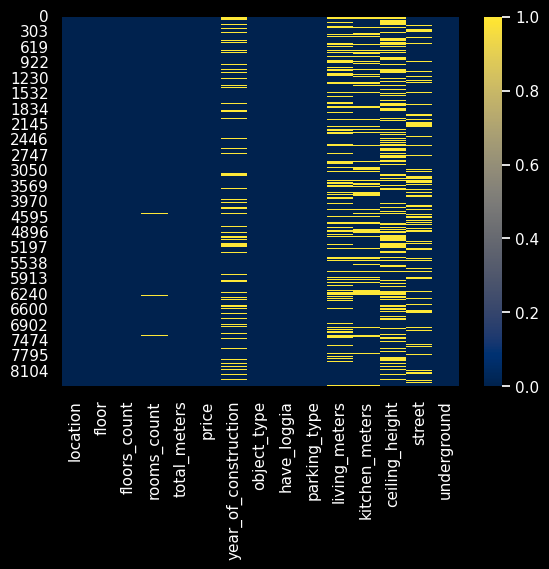

In [209]:
sns.heatmap(datat.isnull(),cmap='cividis')

In [210]:
datat

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,Серпухов,6,6,1,20.7,2350000.0,1917,Вторичка,0,Наземная,18 м²,1 м²,3 м,Крюкова,0
1,Серпухов,1,9,1,33,4150000.0,1975,Вторичка,0,0,18 м²,6 м²,"2,7 м",Ворошилова,1
2,Серпухов,4,4,1,14,1700000.0,NaN,Вторичка,0,0,NaN,NaN,NaN,Красный Текстильщик,0
3,Серпухов,5,5,1,17.5,2500000.0,1968,Вторичка,0,0,NaN,NaN,NaN,Российская,0
4,Серпухов,4,7,1,25.9,3000000.0,2009,Вторичка,0,Наземная,20 м²,5 м²,"3,5 м",Химиков,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8,14,2,69.7,11400000.0,2018,Вторичка,0,0,38 м²,"10,5 м²",NaN,Юбилейная,1
8389,Мытищи,19,25,2,48.1,8607014.0,2025,Новостройка,0,Открытая,"22,7 м²","16,1 м²","2,62 м",NaN,1
8390,Мытищи,3,5,2,45,7300000.0,1968,Вторичка,1 балкон,0,NaN,6 м²,NaN,Юбилейная,1
8391,Мытищи,3,6,2,34,6400000.0,2023,Вторичка,1 балкон,Открытая,19 м²,8 м²,"2,75 м",бульвар Тенистый,1


In [211]:
#Приводим 'year_of_construction' к int
datat['year_of_construction'] = pd.to_numeric(datat['year_of_construction'], errors='coerce')

datat = datat.dropna(subset=['year_of_construction'])

datat['year_of_construction'] = datat['year_of_construction'].astype(int)

print(datat['year_of_construction'].dtype)

print(datat['year_of_construction'].unique())

int64
[1917 1975 1968 2009 1969 1980 1990 1964 2025 2015 1970 1984 1965 2010
 1992 2011 1986 1994 1956 1966 1973 1971 1957 2013 1981 1972 1959 2004
 1962 2019 1978 1977 2003 1963 1952 2024 2007 1995 1976 1982 1953 2008
 2026 2023 1941 1993 2016 2027 2017 2022 1932 2012 1960 2006 1926 2020
 1943 2014 2021 1967 1904 2028 1991 2018 1987 1988 1974 1979 1929 1989
 1985 1930 2005 1958 1996 1940 1948 1961 1938 1997 2002 2001 1999 1983
 1998 1902 2000 1915 1910 1939 1954 1897 1955 1900 1949 1947 1901 1909
 1600 1951 1936 1931 1950 1934 1928 1945 1937 1927 1896 1777 2031 1935]


<ipython-input-211-8c5f484a5561>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datat['year_of_construction'] = datat['year_of_construction'].astype(int)


In [212]:
datat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5911 entries, 0 to 8392
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   location              5911 non-null   object 
 1   floor                 5911 non-null   object 
 2   floors_count          5911 non-null   object 
 3   rooms_count           5848 non-null   object 
 4   total_meters          5911 non-null   object 
 5   price                 5911 non-null   float64
 6   year_of_construction  5911 non-null   int64  
 7   object_type           5911 non-null   object 
 8   have_loggia           5911 non-null   object 
 9   parking_type          5911 non-null   object 
 10  living_meters         4554 non-null   object 
 11  kitchen_meters        4871 non-null   object 
 12  ceiling_height        4338 non-null   object 
 13  street                4526 non-null   object 
 14  underground           5911 non-null   object 
dtypes: float64(1), int64(1), o

In [213]:
# Преобразовать значение в тип float
def safe_float_conversion(value):
    if isinstance(value, str):
        cleaned_value = re.sub(r'[^0-9.-]', '', value)
        try:
            return float(cleaned_value)
        except ValueError:
            return value
    return value

datat = pd.DataFrame(datat)
# Применяем функцию к каждому колонке
datat = datat.apply(lambda x: x.apply(safe_float_conversion))
datat

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
0,Серпухов,6.0,6.0,1.0,20.7,2350000.0,1917,Вторичка,0.0,Наземная,18.0,1.0,3.0,Крюкова,0
1,Серпухов,1.0,9.0,1.0,33.0,4150000.0,1975,Вторичка,0.0,0.0,18.0,6.0,27.0,Ворошилова,1
3,Серпухов,5.0,5.0,1.0,17.5,2500000.0,1968,Вторичка,0.0,0.0,NaN,NaN,NaN,Российская,0
4,Серпухов,4.0,7.0,1.0,25.9,3000000.0,2009,Вторичка,0.0,Наземная,20.0,5.0,35.0,Химиков,0
6,Серпухов,3.0,5.0,1.0,29.0,3350000.0,1917,Вторичка,0.0,Наземная,25.0,NaN,3.0,Форсса,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8388,Мытищи,8.0,14.0,2.0,69.7,11400000.0,2018,Вторичка,0.0,0.0,38.0,105.0,NaN,Юбилейная,1
8389,Мытищи,19.0,25.0,2.0,48.1,8607014.0,2025,Новостройка,0.0,Открытая,227.0,161.0,262.0,NaN,1
8390,Мытищи,3.0,5.0,2.0,45.0,7300000.0,1968,Вторичка,1.0,0.0,NaN,6.0,NaN,Юбилейная,1
8391,Мытищи,3.0,6.0,2.0,34.0,6400000.0,2023,Вторичка,1.0,Открытая,19.0,8.0,275.0,бульвар Тенистый,1


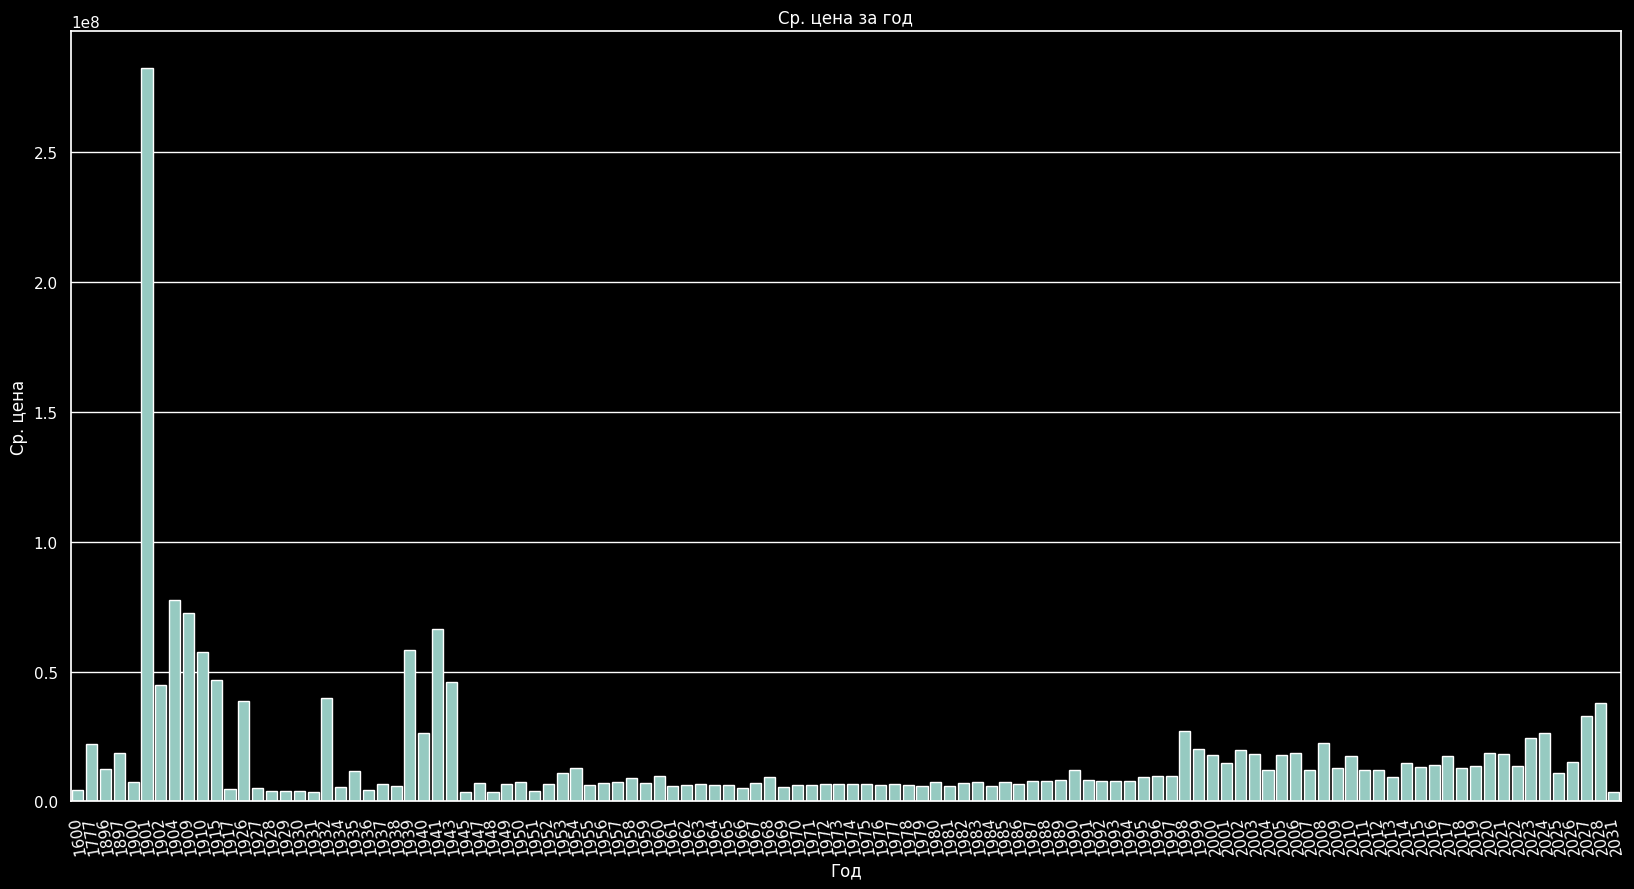

In [214]:
average_prices = datat.groupby('year_of_construction')['price'].mean().reset_index()
average_prices

sns.set_theme(style="darkgrid")
plt.style.use('dark_background')
plt.figure(figsize=(20, 10))
sns.barplot(x='year_of_construction', y='price', data=average_prices)
plt.title('Ср. цена за год')
plt.xlabel('Год')
plt.ylabel('Ср. цена')
plt.xticks(rotation=100)

plt.show()

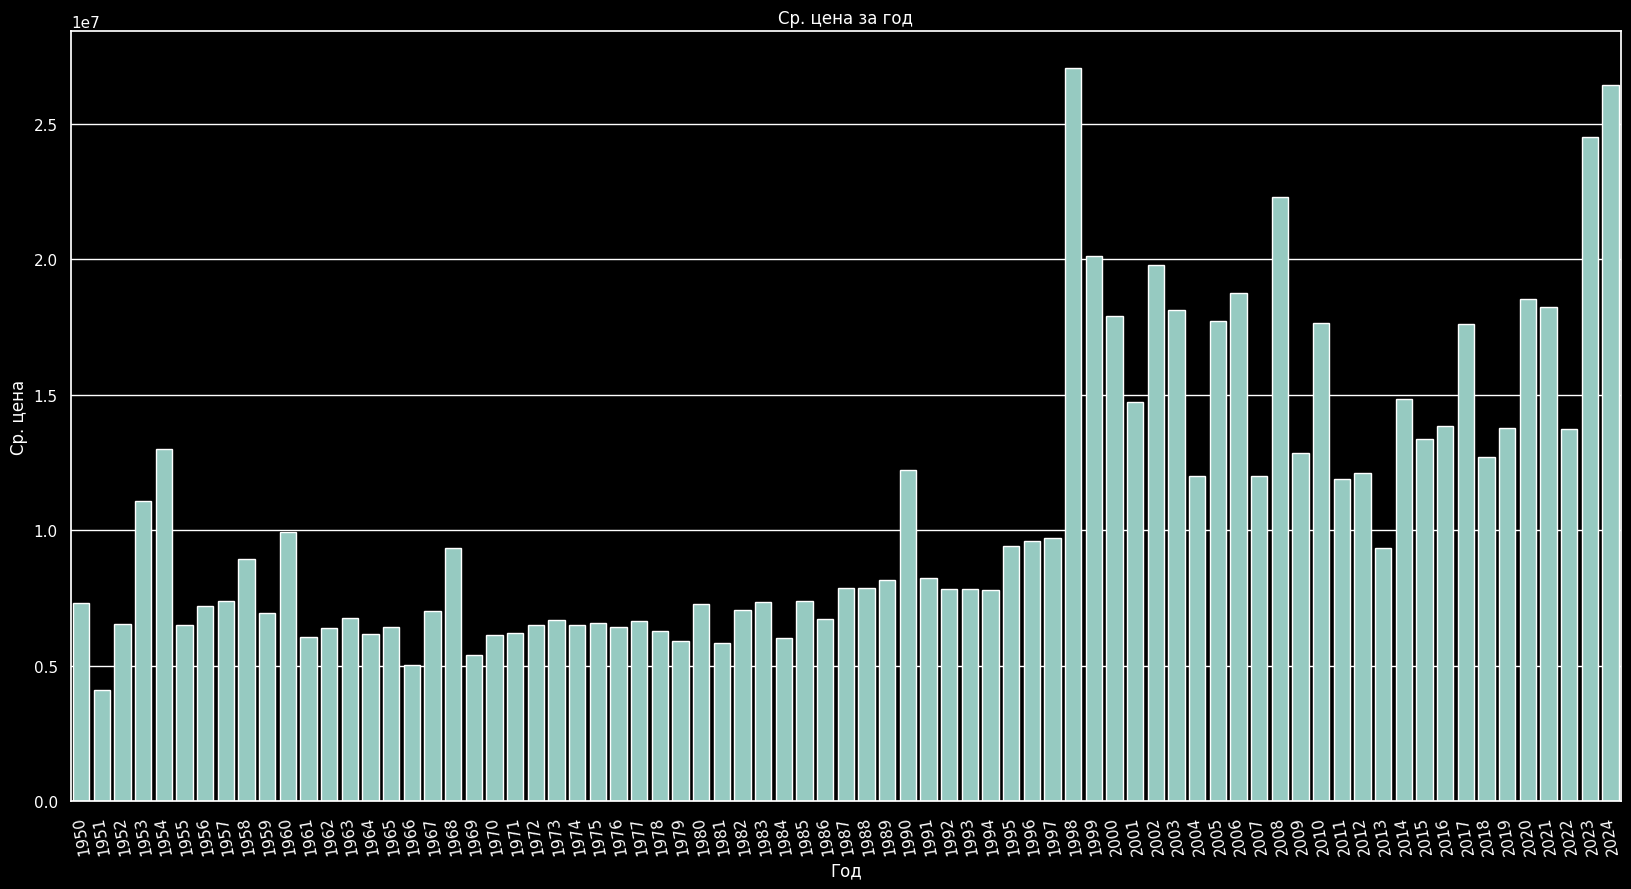

In [215]:
datat = datat[(datat['year_of_construction'] >= 1950) & (datat['year_of_construction'] <= 2024)]

average_prices = datat.groupby('year_of_construction')['price'].mean().reset_index()
average_prices

sns.set_theme(style="darkgrid")
plt.style.use('dark_background')
plt.figure(figsize=(20, 10))
sns.barplot(x='year_of_construction', y='price', data=average_prices)
plt.title('Ср. цена за год')
plt.xlabel('Год')
plt.ylabel('Ср. цена')
plt.xticks(rotation=100)

plt.show()

In [216]:
# Мы удаляем строки из DataFrame datat, где оба столбца living_meters и kitchen_meters содержат пропущенные значения NaN
datat = datat.drop(datat[(pd.isna(datat['living_meters'])) & (pd.isna(datat['kitchen_meters']))].index)
# Мы заполняем пропущенные значения в столбце living_meters значением, вычисленным как разность между total_meters и kitchen_meters
datat.loc[pd.isna(datat['living_meters']), 'living_meters'] = datat['total_meters'] - datat['kitchen_meters']
# Мы заполняем пропущенные значения в столбце kitchen_meters значением, вычисленным как разность между total_meters и living_meters
datat.loc[pd.isna(datat['kitchen_meters']), 'kitchen_meters'] = datat['total_meters'] - datat['living_meters']
# Мы фильтруем DataFrame datat, оставляя только строки, где столбец street не содержит пропущенных значений NaN
datat = datat.loc[datat['street'].notna()]


<Axes: >

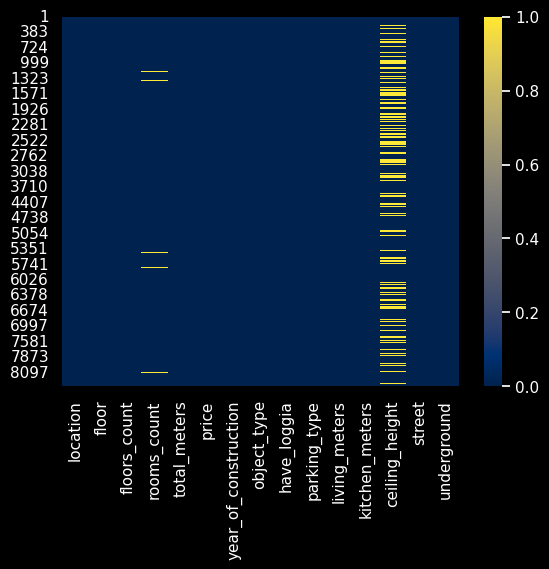

In [217]:
sns.set_theme(style="darkgrid")
plt.style.use('dark_background')
sns.heatmap(datat.isnull(),cmap='cividis')

Количество комнат

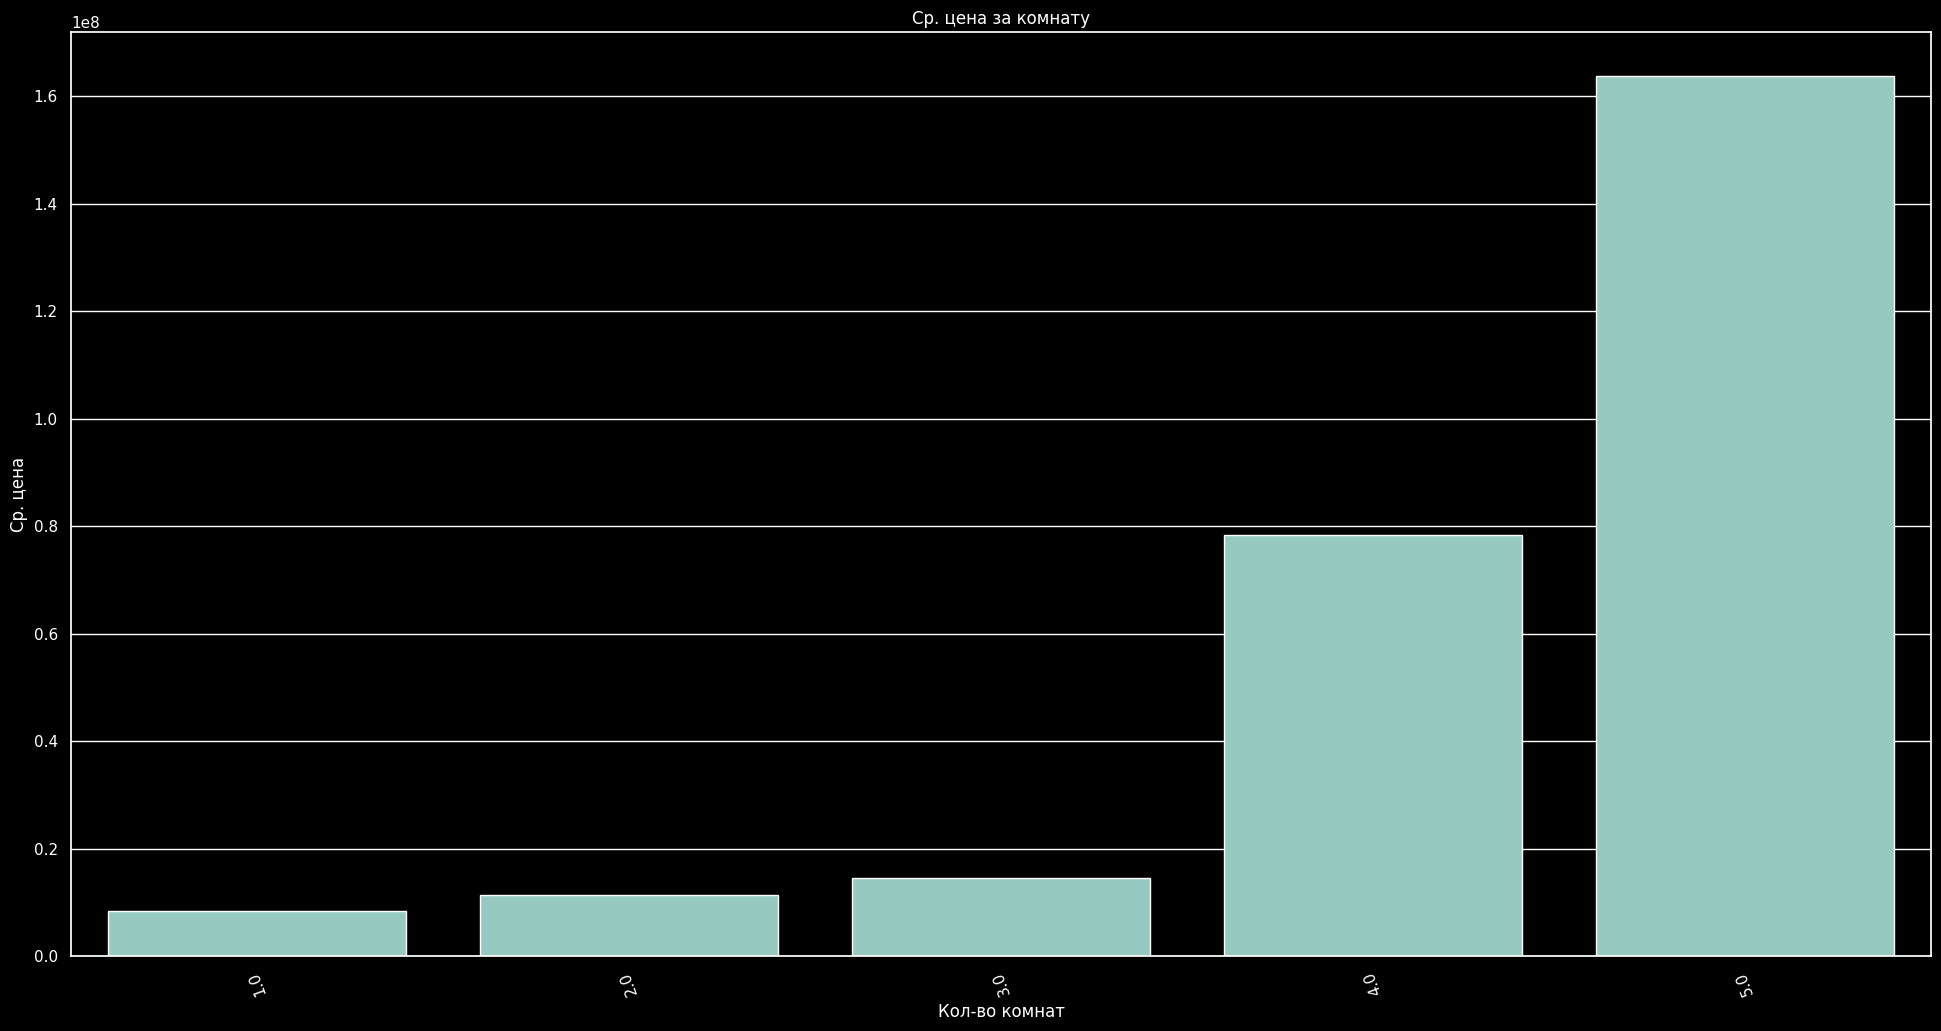

In [218]:
datat = datat.dropna(subset=['rooms_count'])

average_prices = datat.groupby('rooms_count')['price'].mean().reset_index()
average_prices

sns.set_theme(style="darkgrid")
plt.style.use('dark_background')
plt.figure(figsize=(24, 12))
sns.barplot(x='rooms_count', y='price', data=average_prices)
plt.title('Ср. цена за комнату')
plt.xlabel('Кол-во комнат')
plt.ylabel('Ср. цена')
plt.xticks(rotation=110)

plt.show()

In [219]:
datat.loc[datat['ceiling_height'].nlargest(10).index] # максимальная высота потолков

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
4127,Долгопрудный,5.0,19.0,2.0,67.60,15700000.0,2015,Вторичка,1.0,Наземная,392.0,114.0,2.780000e+16,проспект Ракетостроителей,1
5849,Москва,6.0,6.0,5.0,310.15,325657500.0,2023,Вторичка / Апартаменты,0.0,Подземная,1969.0,227.0,4.550000e+02,Зубовская,1
1467,Яхрома,8.0,8.0,1.0,35.20,7000000.0,2022,Вторичка,1.0,Наземная,115.0,15.0,3.750000e+02,Галины Вишневской,1
2998,Москва,4.0,4.0,4.0,288.00,574431000.0,2024,Вторичка,2.0,0.0,268.0,20.0,3.720000e+02,Солянка,1
1806,Бекасово,1.0,5.0,1.0,37.20,5780000.0,1974,Вторичка,0.0,Наземная,-47.8,85.0,3.450000e+02,Косогорная,0
6719,Пересвет,1.0,5.0,1.0,37.20,5780000.0,1974,Вторичка,0.0,Наземная,-47.8,85.0,3.450000e+02,Косогорная,0
4556,Щёлково,14.0,17.0,1.0,40.52,7189400.0,2024,Новостройка,1.0,0.0,224.0,97.0,3.360000e+02,Полевая,1
4676,Щёлково,8.0,17.0,1.0,36.46,6638500.0,2024,Новостройка,1.0,0.0,173.0,102.0,3.360000e+02,Полевая,1
4709,Щёлково,8.0,17.0,1.0,37.60,6723200.0,2024,Новостройка,1.0,0.0,203.0,106.0,3.360000e+02,Полевая,1
5233,Щёлково,3.0,17.0,2.0,73.18,11877300.0,2023,Новостройка,1.0,0.0,418.0,125.0,3.360000e+02,Строителей,1


In [220]:
datat.loc[datat['ceiling_height'].nsmallest(10).index] # минимальная высота потолков

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
2927,Москва,8.0,17.0,1.0,36.2,27000000.0,1968,Вторичка,0.0,Наземная,22.0,8.0,2.0,Садовая-Триумфальная,1
5347,Видное,10.0,17.0,1.0,38.3,9700000.0,2016,Вторичка,11.0,Открытая,18.0,9.0,2.0,Березовая,1
6171,Люберцы,22.0,25.0,2.0,90.0,17900000.0,2012,Вторичка,1.0,Открытая,48.0,15.0,2.0,проспект Гагарина,1
8200,Мытищи,11.0,13.0,1.0,33.6,3000000.0,2018,Вторичка / Апартаменты,0.0,Наземная,20.0,10.0,2.0,Стрелковая,1
49,Серпухов,6.0,6.0,2.0,56.8,4950000.0,2004,Вторичка,0.0,Наземная,30.0,10.0,3.0,Карла Маркса,0
56,Серпухов,2.0,10.0,1.0,59.0,11300000.0,2011,Вторичка,1.0,Наземная,181.0,20.0,3.0,Советская,0
80,Дубна,1.0,2.0,2.0,47.7,5500000.0,1952,Вторичка,0.0,Наземная,33.0,41.0,3.0,Курчатова,0
91,Дубна,2.0,2.0,2.0,59.3,9700000.0,1952,Вторичка,1.0,Наземная,312.0,102.0,3.0,Ленина,0
99,Дубна,2.0,5.0,3.0,73.7,15500000.0,1959,Вторичка,0.0,Наземная,505.0,78.0,3.0,Центральная,0
103,Дубна,2.0,2.0,3.0,81.0,13500000.0,1953,Вторичка,0.0,Наземная,52.0,10.0,3.0,Центральная,0


In [221]:
# Удаляем выбросы
datat.drop(4127, inplace=True)
datat.drop(5849, inplace=True)
datat.drop(1467, inplace=True)
datat.drop(2998, inplace=True)
datat.drop(1806, inplace=True)
datat.drop(6719, inplace=True)
datat.drop(4556, inplace=True)
datat.drop(4676, inplace=True)
datat.drop(4709, inplace=True)
datat.drop(5233, inplace=True)

In [222]:
datat['ceiling_height'] = datat['ceiling_height'].fillna(datat['ceiling_height'].mean()).round(2)
datat

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
1,Серпухов,1.0,9.0,1.0,33.0,4150000.0,1975,Вторичка,0.0,0.0,18.0,6.0,27.00,Ворошилова,1
4,Серпухов,4.0,7.0,1.0,25.9,3000000.0,2009,Вторичка,0.0,Наземная,20.0,5.0,35.00,Химиков,0
9,Серпухов,6.0,9.0,2.0,42.7,3990000.0,1980,Вторичка,1.0,Наземная,297.0,56.0,27.00,Весенняя,0
10,Серпухов,1.0,5.0,2.0,42.8,2999000.0,1990,Вторичка,1.0,Наземная,249.0,6.0,25.00,Южная,0
13,Серпухов,1.0,3.0,1.0,25.3,2500000.0,2015,Вторичка,1.0,0.0,141.0,62.0,28.00,Солнечный Град,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8385,Мытищи,17.0,17.0,2.0,52.2,9850000.0,2013,Вторичка,1.0,Наземная,27.0,109.0,28.00,2-я Институтская,1
8387,Мытищи,2.0,7.0,2.0,60.0,11950000.0,2017,Вторичка,0.0,Подземная,35.0,18.0,285.00,Осташковское шоссе,1
8388,Мытищи,8.0,14.0,2.0,69.7,11400000.0,2018,Вторичка,0.0,0.0,38.0,105.0,80.95,Юбилейная,1
8390,Мытищи,3.0,5.0,2.0,45.0,7300000.0,1968,Вторичка,1.0,0.0,39.0,6.0,80.95,Юбилейная,1


<Axes: >

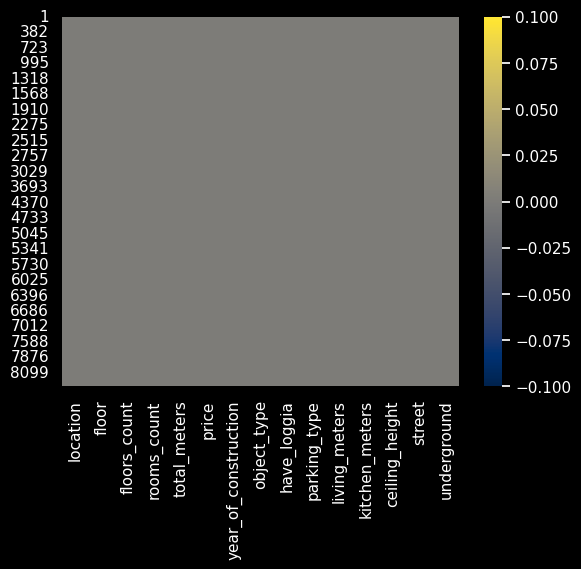

In [223]:
sns.set_theme(style="darkgrid")
plt.style.use('dark_background')
sns.heatmap(datat.isnull(),cmap='cividis')

Средняя цена по городам

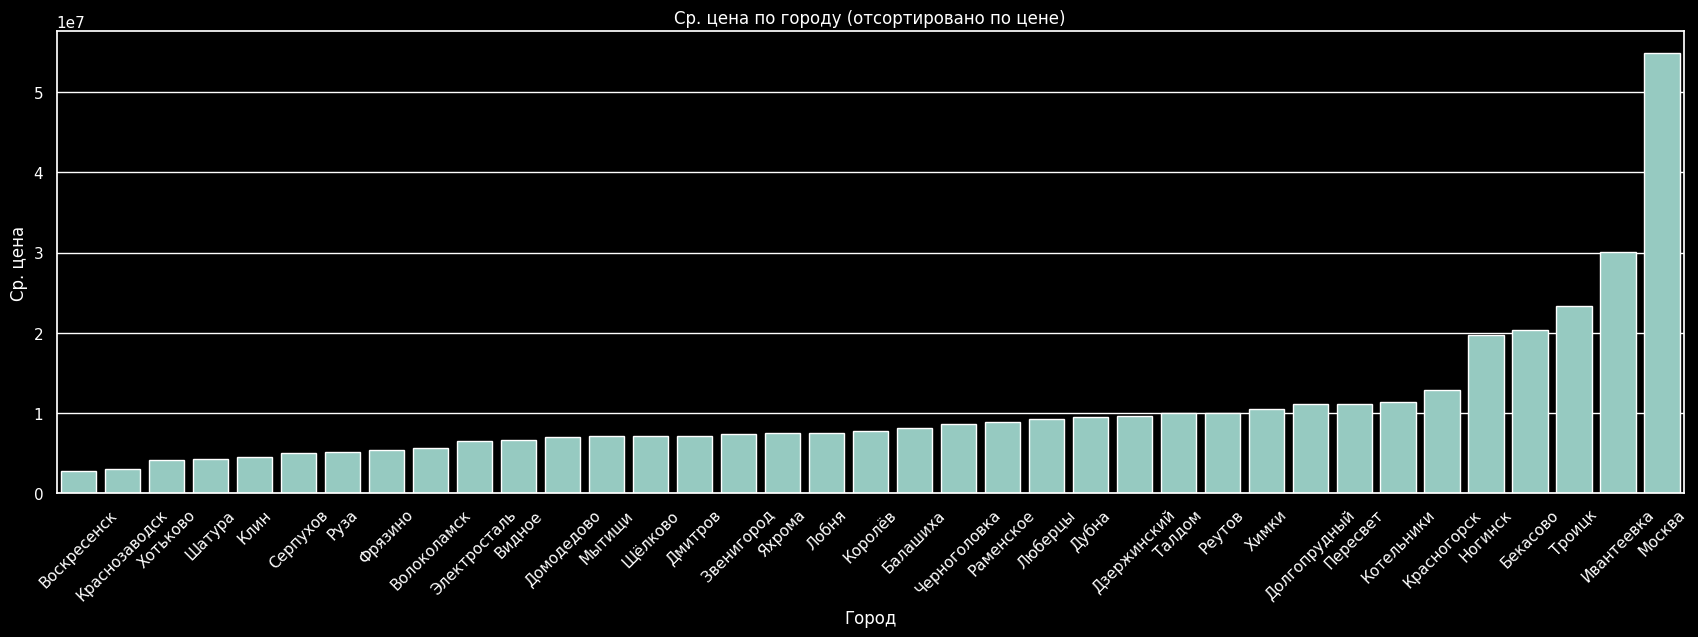

In [224]:
average_prices = datat.groupby('location')['price'].mean().reset_index()

# Сортировка по возрастанию средней цены
average_prices_sorted = average_prices.sort_values(by='price')

sns.set_theme(style="darkgrid")
plt.style.use('dark_background')

plt.figure(figsize=(21, 6))
sns.barplot(x='location', y='price', data=average_prices_sorted)
plt.title('Ср. цена по городу (отсортировано по цене)')
plt.xlabel('Город')
plt.ylabel('Ср. цена')
plt.xticks(rotation=45)

plt.show()

Кодирование

In [225]:
#Напишем функцию, которая принимает на вход наши данные, кодирует числовыми значениями категориальные признаки
#и возвращает обновленный данные и сами кодировщики
def number_encode_features(init_df):
    result = init_df.copy()  # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result[column].dtype == object:  # если тип столбца - строка, то нужно его закодировать
            # Преобразуем все значения в строки
            result[column] = result[column].astype(str)
            encoders[column] = preprocessing.LabelEncoder()  # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column])  # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(datat) #Теперь encoded data содержит закодированные категориальные признаки
encoded_data.head() #проверяем

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground
1,26,1.0,9.0,1.0,33.0,4150000.0,1975,0,0.0,0,18.0,6.0,27.0,111,1
4,26,4.0,7.0,1.0,25.9,3000000.0,2009,0,0.0,2,20.0,5.0,35.0,493,0
9,26,6.0,9.0,2.0,42.7,3990000.0,1980,0,1.0,2,297.0,56.0,27.0,611,0
10,26,1.0,5.0,2.0,42.8,2999000.0,1990,0,1.0,2,249.0,6.0,25.0,528,0
13,26,1.0,3.0,1.0,25.3,2500000.0,2015,0,1.0,0,141.0,62.0,28.0,435,0


Корреляция

<Axes: >

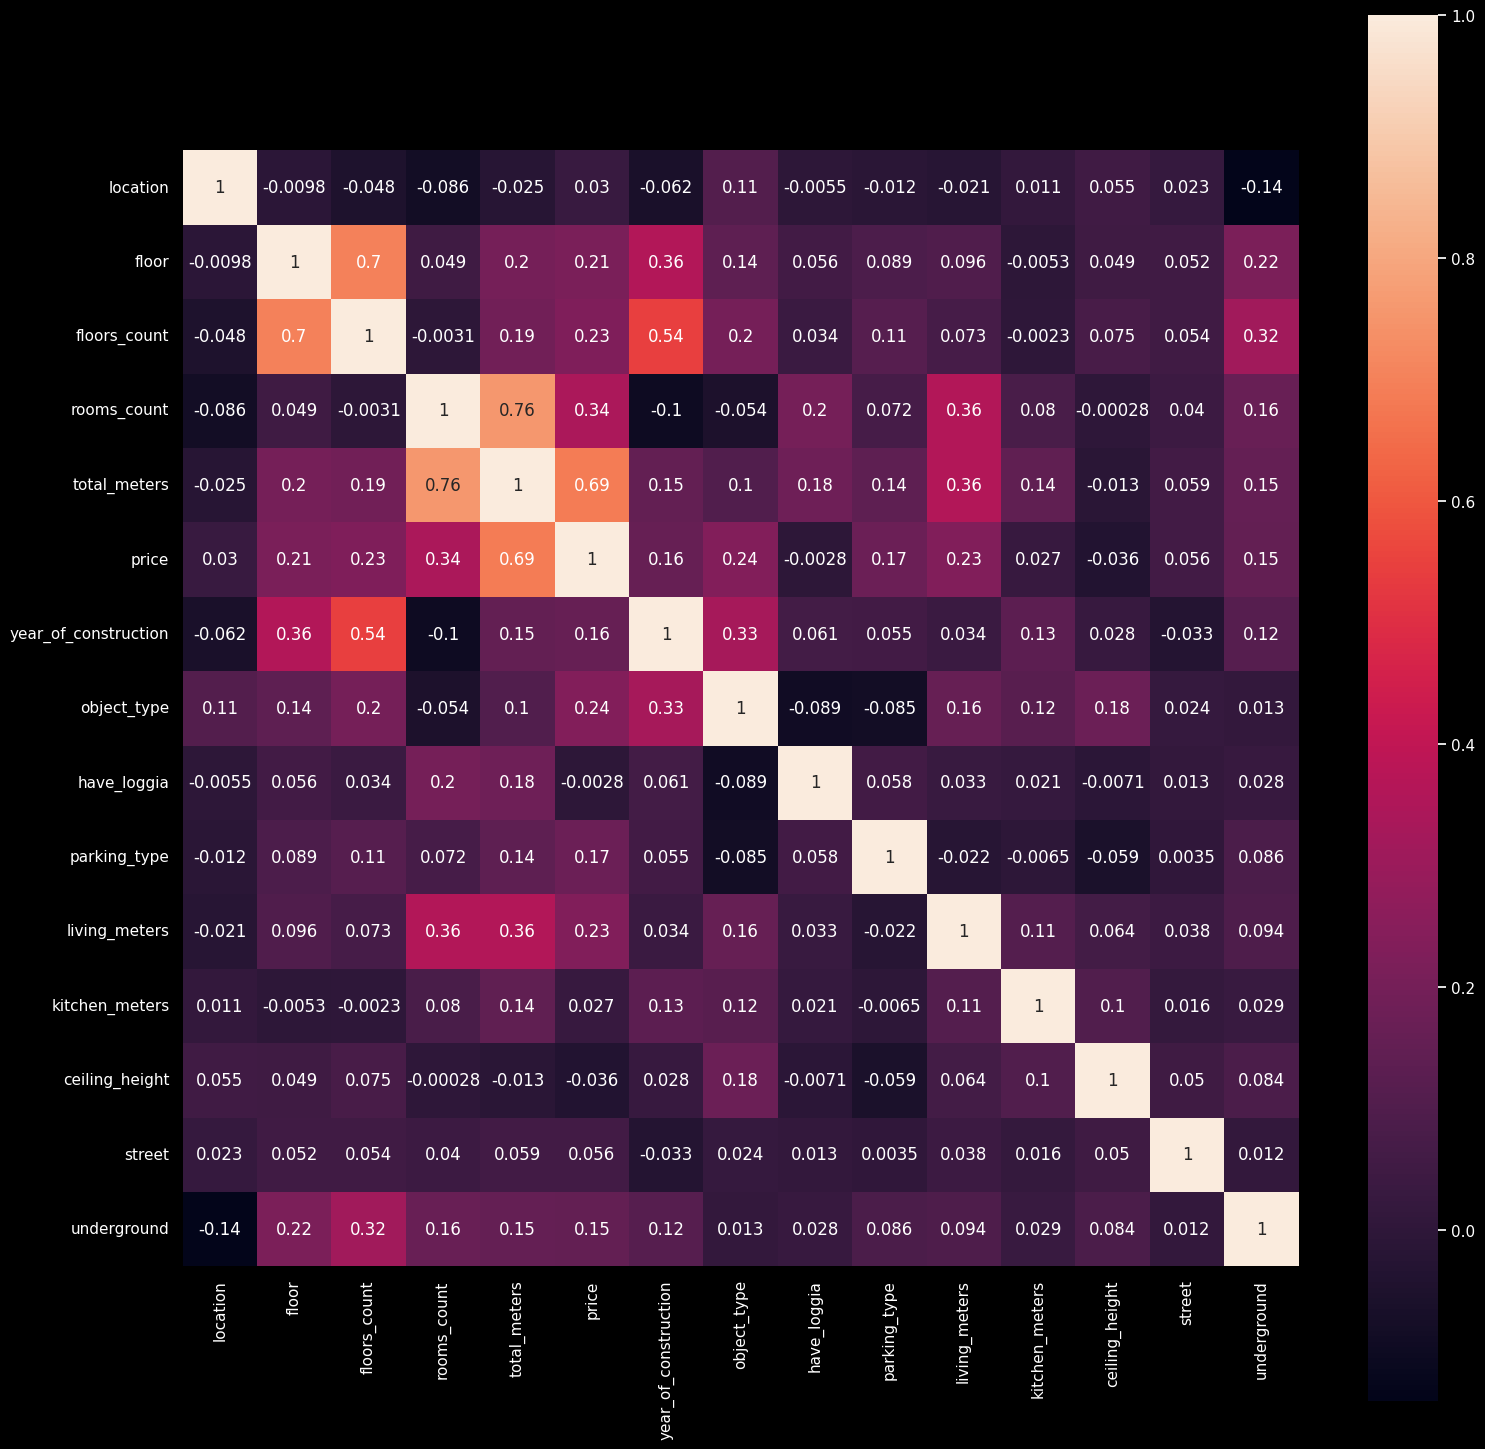

In [226]:
sns.set_theme(style="darkgrid")
plt.style.use('dark_background')

plt.subplots(figsize=(18,18))
encoded_data, encoders = number_encode_features(datat)
sns.heatmap(encoded_data.corr(), square=True, annot=True)

In [227]:
datat['price_per_square_meter'] = datat['price'] / datat['total_meters'] # Добавяем колонку с ценой за квадратный метр
datat

,location,floor,floors_count,rooms_count,total_meters,price,year_of_construction,object_type,have_loggia,parking_type,living_meters,kitchen_meters,ceiling_height,street,underground,price_per_square_meter
1,Серпухов,1.0,9.0,1.0,33.0,4150000.0,1975,Вторичка,0.0,0.0,18.0,6.0,27.00,Ворошилова,1,125757.575758
4,Серпухов,4.0,7.0,1.0,25.9,3000000.0,2009,Вторичка,0.0,Наземная,20.0,5.0,35.00,Химиков,0,115830.115830
9,Серпухов,6.0,9.0,2.0,42.7,3990000.0,1980,Вторичка,1.0,Наземная,297.0,56.0,27.00,Весенняя,0,93442.622951
10,Серпухов,1.0,5.0,2.0,42.8,2999000.0,1990,Вторичка,1.0,Наземная,249.0,6.0,25.00,Южная,0,70070.093458
13,Серпухов,1.0,3.0,1.0,25.3,2500000.0,2015,Вторичка,1.0,0.0,141.0,62.0,28.00,Солнечный Град,0,98814.229249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8385,Мытищи,17.0,17.0,2.0,52.2,9850000.0,2013,Вторичка,1.0,Наземная,27.0,109.0,28.00,2-я Институтская,1,188697.318008
8387,Мытищи,2.0,7.0,2.0,60.0,11950000.0,2017,Вторичка,0.0,Подземная,35.0,18.0,285.00,Осташковское шоссе,1,199166.666667
8388,Мытищи,8.0,14.0,2.0,69.7,11400000.0,2018,Вторичка,0.0,0.0,38.0,105.0,80.95,Юбилейная,1,163558.106169
8390,Мытищи,3.0,5.0,2.0,45.0,7300000.0,1968,Вторичка,1.0,0.0,39.0,6.0,80.95,Юбилейная,1,162222.222222


In [228]:
datat['price_per_square_meter'].mean() # Вычисление цены за квадратный метр

212425.0046937107

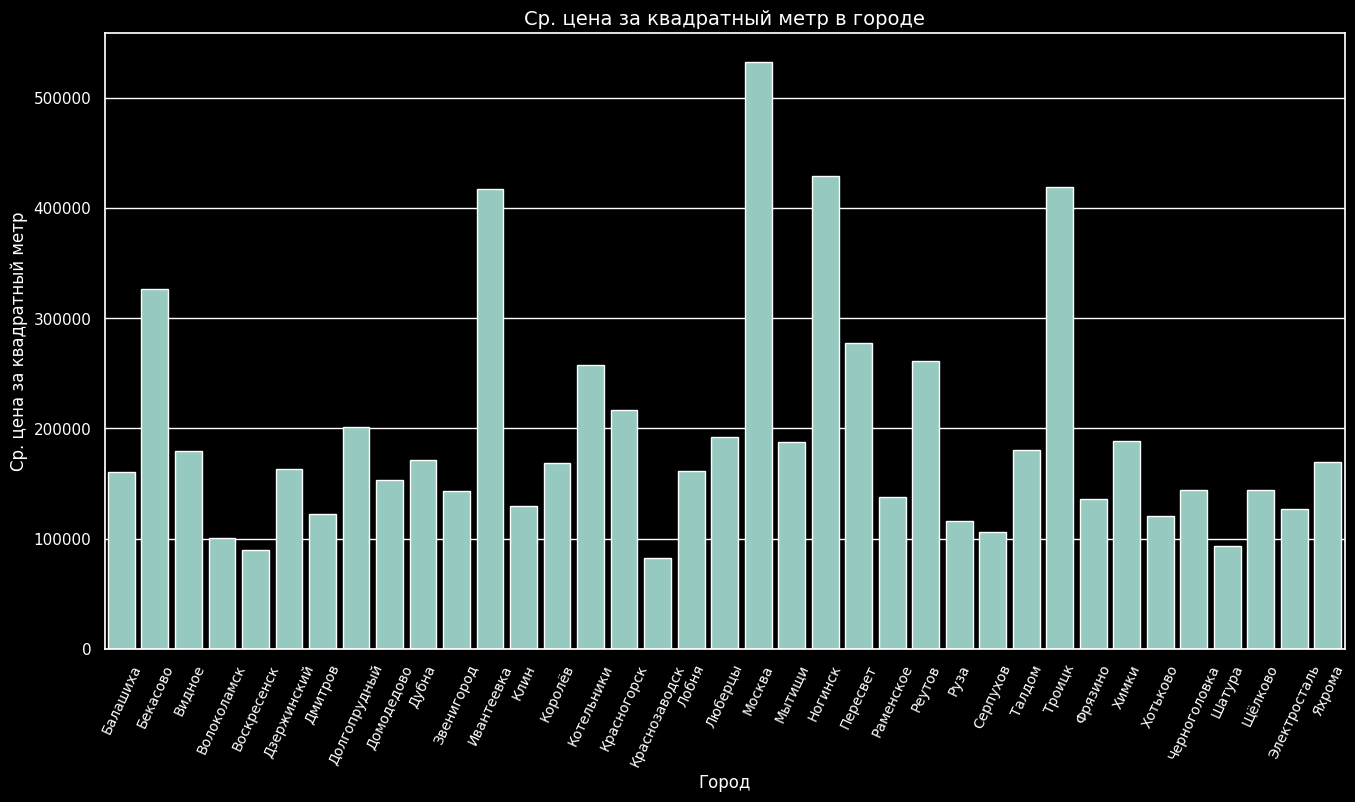

In [229]:
 #Вычисляем среднюю цену за квадратный метр для каждого города
average_price_per_square_meter = datat.groupby('location')['price_per_square_meter'].mean().reset_index()

# Устанавливаем тему и стиль для графиков
sns.set_theme(style="darkgrid")
plt.style.use('dark_background')

# Создаем фигуру и оси для графика с заданным размером
plt.figure(figsize=(16, 8))

# Строим столбчатую диаграмму
sns.barplot(x='location', y='price_per_square_meter', data=average_price_per_square_meter)

# Устанавливаем заголовок и подписи осей с уменьшенным шрифтом
plt.title('Ср. цена за квадратный метр в городе', fontsize=14)
plt.xlabel('Город', fontsize=12)
plt.ylabel('Ср. цена за квадратный метр', fontsize=12)

# Поворачиваем подписи на оси X на 45 градусов для лучшей читаемости и уменьшаем шрифт
plt.xticks(rotation=65, fontsize=10)

# Отображаем график
plt.show()

<Axes: >

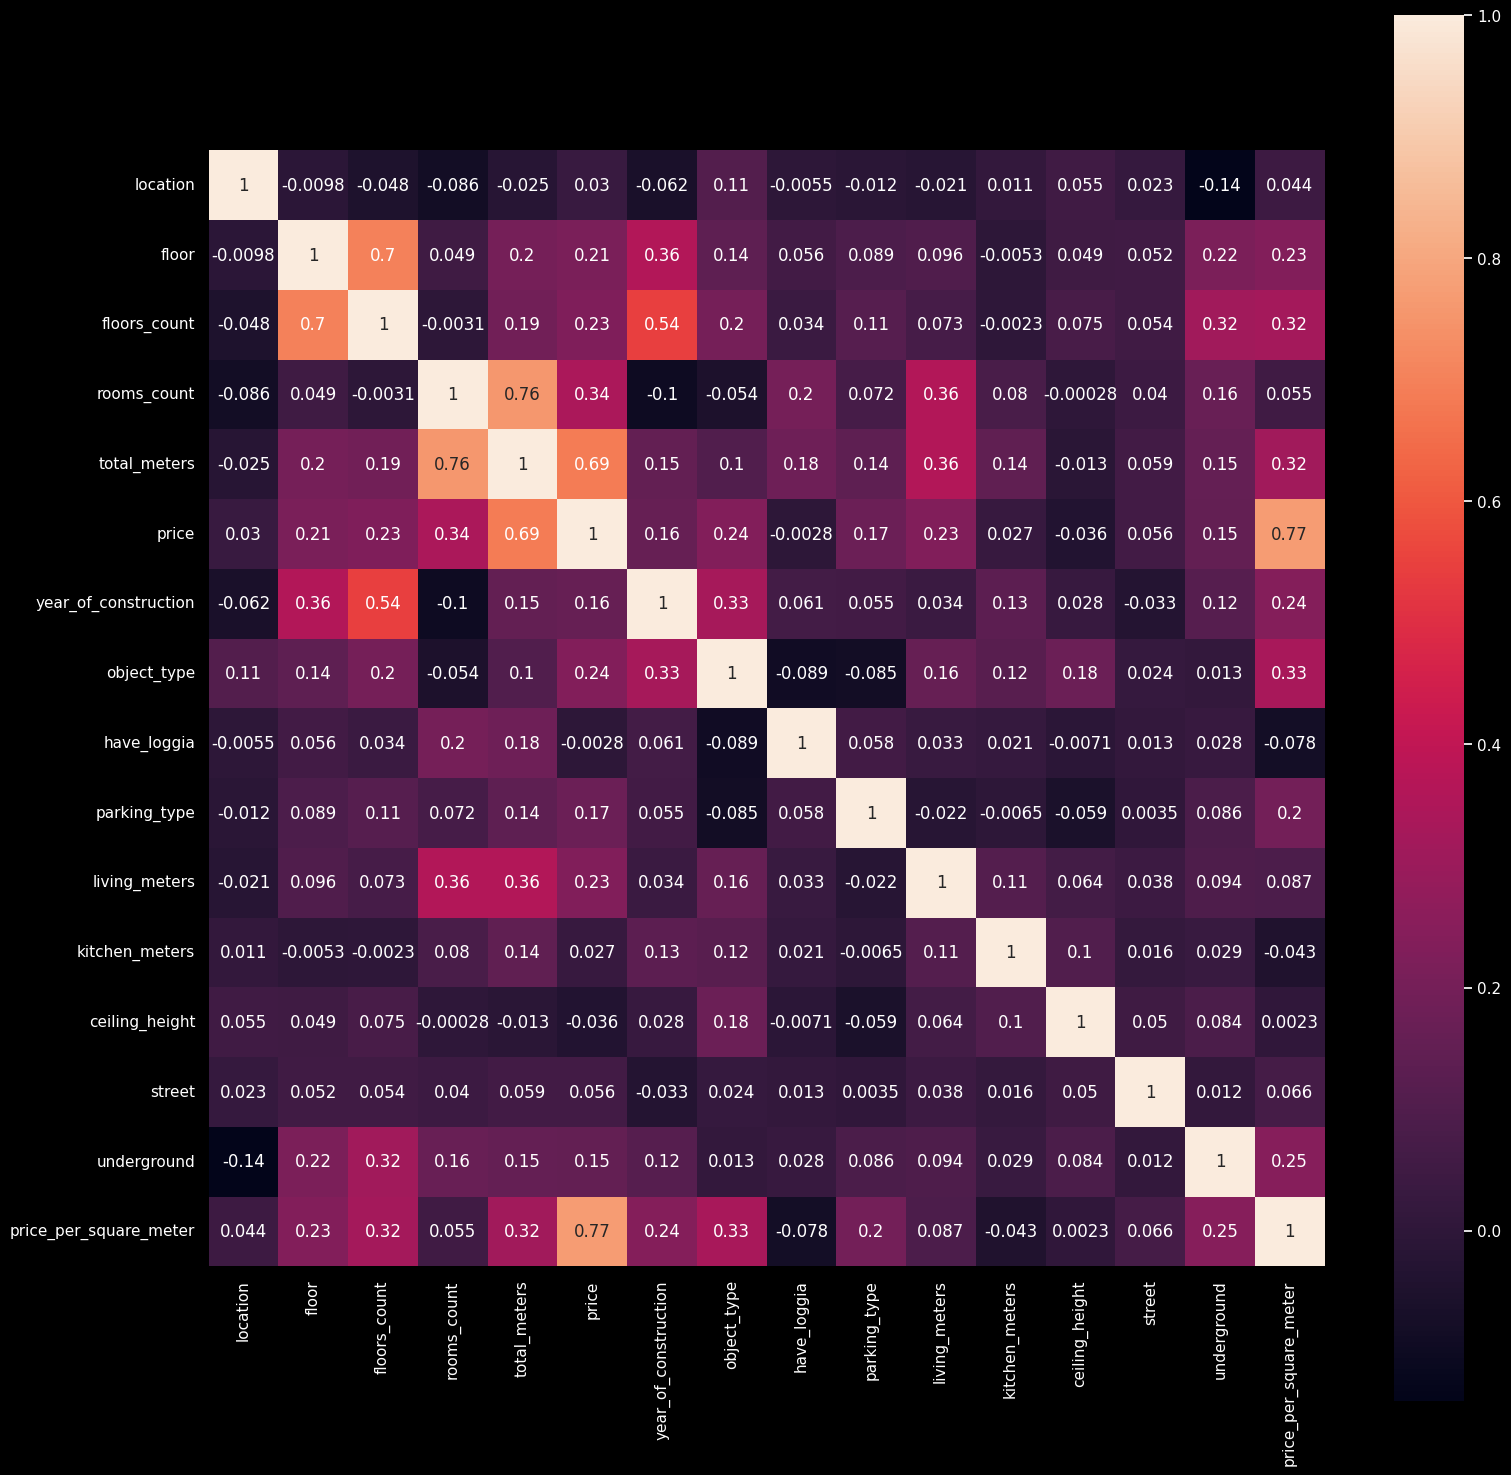

In [230]:
sns.set_theme(style="darkgrid")
plt.style.use('dark_background')

plt.subplots(figsize=(18,18))
encoded_data, encoders = number_encode_features(datat)
sns.heatmap(encoded_data.corr(), square=True, annot=True)

**Сильная положительная корреляция:**

price и price_per_square_meter (0.78): Чем выше цена, тем выше стоимость за квадратный метр.
rooms_count и total_meters (0.76): Большее количество комнат связано с большей общей площадью.
floors_count и year_of_construction (0.55): Более новые здания имеют больше этажей.

**Умеренная положительная корреляция:**

floor и price (0.34): Большее расположение по этажам связано с более высокой ценой.
living_meters и price_per_square_meter (0.25): Жилая площадь положительно коррелирует с ценой за квадратный метр.
total_meters и price_per_square_meter (0.33): Большая общая площадь связана с более высокой ценой за квадратный метр.

**Слабая положительная корреляция:**

object_type и price (0.32): Тип объекта влияет на цену.
floor и rooms_count (0.34): Количество этажей связано с количеством комнат.

**Слабая отрицательная корреляция:**

underground и location (-0.17): Наличие подземных объектов связано с ухудшением местоположения.
street и price_per_square_meter (-0.15): Наличие улицы связано с небольшим уменьшением цены за квадратный метр.

